In [1]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=d04b4d31268b0425b32b604dd27d0eda9c1c0967196ab8acf74e1c4c650cb769
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
import pyspark
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, abs, count, sum
from pyspark.sql.types import IntegerType, DoubleType, BooleanType, DateType

spark = SparkSession.builder.getOrCreate()

In [3]:
#Read data using pandas
import pandas as pd
athletes_url = "https://raw.githubusercontent.com/melbinmv/Azure_Olympic/master/data/Athletes.csv"
coaches_url = "https://raw.githubusercontent.com/melbinmv/Azure_Olympic/master/data/Coaches.csv"
entriesgender_url = "https://raw.githubusercontent.com/melbinmv/Azure_Olympic/master/data/EntriesGender.csv"
medals_url = "https://raw.githubusercontent.com/melbinmv/Azure_Olympic/master/data/Medals.csv"
teams_url = "https://raw.githubusercontent.com/melbinmv/Azure_Olympic/master/data/Teams.csv"


athelets = pd.read_csv(athletes_url, encoding='latin-1')
coaches = pd.read_csv(coaches_url, encoding='latin-1')
entriesgender = pd.read_csv(entriesgender_url, encoding='latin-1')
medals = pd.read_csv(medals_url, encoding='latin-1')
teams = pd.read_csv(teams_url, encoding='latin-1')

#Convert into a spark dataframe
athletes_df = spark.createDataFrame(athelets)
coaches_df = spark.createDataFrame(coaches)
entriesgender_df = spark.createDataFrame(entriesgender)
medals_df = spark.createDataFrame(medals)
teams_df = spark.createDataFrame(teams)

In [4]:
athletes_df.show(10)

+-----------------+--------------------+-------------------+
|       PersonName|             Country|         Discipline|
+-----------------+--------------------+-------------------+
|  AALERUD Katrine|              Norway|       Cycling Road|
|      ABAD Nestor|               Spain|Artistic Gymnastics|
|ABAGNALE Giovanni|               Italy|             Rowing|
|   ABALDE Alberto|               Spain|         Basketball|
|    ABALDE Tamara|               Spain|         Basketball|
|        ABALO Luc|              France|           Handball|
|     ABAROA Cesar|               Chile|             Rowing|
|    ABASS Abobakr|               Sudan|           Swimming|
| ABBASALI Hamideh|Islamic Republic ...|             Karate|
|    ABBASOV Islam|          Azerbaijan|          Wrestling|
+-----------------+--------------------+-------------------+
only showing top 10 rows



In [5]:
athletes_df.printSchema()

root
 |-- PersonName: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Discipline: string (nullable = true)



In [6]:
coaches_df.show(10)

+--------------------+--------------------+-----------------+--------+
|                Name|             Country|       Discipline|   Event|
+--------------------+--------------------+-----------------+--------+
|     ABDELMAGID Wael|               Egypt|         Football|     NaN|
|           ABE Junya|               Japan|       Volleyball|     NaN|
|       ABE Katsuhiko|               Japan|       Basketball|     NaN|
|        ADAMA Cherif|       Côte d'Ivoire|         Football|     NaN|
|          AGEBA Yuya|               Japan|       Volleyball|     NaN|
|AIKMAN Siegfried ...|               Japan|           Hockey|     Men|
|       AL SAADI Kais|             Germany|           Hockey|     Men|
|       ALAMEDA Lonni|              Canada|Baseball/Softball|Softball|
|     ALEKNO Vladimir|Islamic Republic ...|       Volleyball|     Men|
|     ALEKSEEV Alexey|                 ROC|         Handball|   Women|
+--------------------+--------------------+-----------------+--------+
only s

In [7]:
coaches_df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Discipline: string (nullable = true)
 |-- Event: string (nullable = true)



In [8]:
entriesgender_df.show(10)

+-------------------+------+----+-----+
|         Discipline|Female|Male|Total|
+-------------------+------+----+-----+
|     3x3 Basketball|    32|  32|   64|
|            Archery|    64|  64|  128|
|Artistic Gymnastics|    98|  98|  196|
|  Artistic Swimming|   105|   0|  105|
|          Athletics|   969|1072| 2041|
|          Badminton|    86|  87|  173|
|  Baseball/Softball|    90| 144|  234|
|         Basketball|   144| 144|  288|
|   Beach Volleyball|    48|  48|   96|
|             Boxing|   102| 187|  289|
+-------------------+------+----+-----+
only showing top 10 rows



In [9]:
entriesgender_df.printSchema()

root
 |-- Discipline: string (nullable = true)
 |-- Female: long (nullable = true)
 |-- Male: long (nullable = true)
 |-- Total: long (nullable = true)



In [10]:
#Converting entries gender rows to integer
entriesgender_df = entriesgender_df.withColumn("Female",col("Female").cast(IntegerType()))\
    .withColumn("Male",col("Male").cast(IntegerType()))\
    .withColumn("Total",col("Total").cast(IntegerType()))

In [11]:
medals_df.show(10)

+----+--------------------+----+------+------+-----+-------------+
|Rank|        Team_Country|Gold|Silver|Bronze|Total|Rank by Total|
+----+--------------------+----+------+------+-----+-------------+
|   1|United States of ...|  39|    41|    33|  113|            1|
|   2|People's Republic...|  38|    32|    18|   88|            2|
|   3|               Japan|  27|    14|    17|   58|            5|
|   4|       Great Britain|  22|    21|    22|   65|            4|
|   5|                 ROC|  20|    28|    23|   71|            3|
|   6|           Australia|  17|     7|    22|   46|            6|
|   7|         Netherlands|  10|    12|    14|   36|            9|
|   8|              France|  10|    12|    11|   33|           10|
|   9|             Germany|  10|    11|    16|   37|            8|
|  10|               Italy|  10|    10|    20|   40|            7|
+----+--------------------+----+------+------+-----+-------------+
only showing top 10 rows



In [12]:
medals_df.printSchema()

root
 |-- Rank: long (nullable = true)
 |-- Team_Country: string (nullable = true)
 |-- Gold: long (nullable = true)
 |-- Silver: long (nullable = true)
 |-- Bronze: long (nullable = true)
 |-- Total: long (nullable = true)
 |-- Rank by Total: long (nullable = true)



In [13]:
medals_df = medals_df.withColumn("Gold",col("Gold").cast(IntegerType()))\
    .withColumn("Silver",col("Silver").cast(IntegerType()))\
    .withColumn("Bronze",col("Bronze").cast(IntegerType()))\
    .withColumn("Total",col("Total").cast(IntegerType()))

In [14]:
teams_df.show(10)

+-----------+--------------+--------------------+-----+
|   TeamName|    Discipline|             Country|Event|
+-----------+--------------+--------------------+-----+
|    Belgium|3x3 Basketball|             Belgium|  Men|
|      China|3x3 Basketball|People's Republic...|  Men|
|      China|3x3 Basketball|People's Republic...|Women|
|     France|3x3 Basketball|              France|Women|
|      Italy|3x3 Basketball|               Italy|Women|
|      Japan|3x3 Basketball|               Japan|  Men|
|      Japan|3x3 Basketball|               Japan|Women|
|     Latvia|3x3 Basketball|              Latvia|  Men|
|   Mongolia|3x3 Basketball|            Mongolia|Women|
|Netherlands|3x3 Basketball|         Netherlands|  Men|
+-----------+--------------+--------------------+-----+
only showing top 10 rows



In [15]:
teams_df.printSchema()

root
 |-- TeamName: string (nullable = true)
 |-- Discipline: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Event: string (nullable = true)



In [16]:


athletes_df.select("PersonName", "Discipline").orderBy("Discipline").show()

athletes_df.select("PersonName")

+------------------+--------------+
|        PersonName|    Discipline|
+------------------+--------------+
|   BOGAERTS Rafael|3x3 Basketball|
|   PAGET Marie-Eve|3x3 Basketball|
|BAYASGALAN Solongo|3x3 Basketball|
|      YAMAMOTO Mai|3x3 Basketball|
|    BEKKERING Ross|3x3 Basketball|
|   PAWLOWSKI Pawel|3x3 Basketball|
|         BROWN Ira|3x3 Basketball|
|       KOZIK Yulia|3x3 Basketball|
|      CAVARS Agnis|3x3 Basketball|
|    PISKLOV Kirill|3x3 Basketball|
|        CELIS Nick|3x3 Basketball|
|         LI Haonan|3x3 Basketball|
|  CONSOLINI Chiara|3x3 Basketball|
|       PLUM Kelsey|3x3 Basketball|
|      CUIC Claudia|3x3 Basketball|
| ONOLBAATAR Khulan|3x3 Basketball|
|     D ALIE Raelin|3x3 Basketball|
| RATKOV Aleksandar|3x3 Basketball|
|   DOLSON Stefanie|3x3 Basketball|
|    MARIEN Thierry|3x3 Basketball|
+------------------+--------------+
only showing top 20 rows



DataFrame[PersonName: string]

In [17]:
# Calculate gender disparity and identify the discipline with the highest value
entriesgender_df.withColumn("GenderDisparity", abs(col("Female") - col("Male")))\
    .orderBy("GenderDisparity", ascending=False)\
    .show(5)


+-------------------+------+----+-----+---------------+
|         Discipline|Female|Male|Total|GenderDisparity|
+-------------------+------+----+-----+---------------+
|  Artistic Swimming|   105|   0|  105|            105|
|          Athletics|   969|1072| 2041|            103|
|          Wrestling|    96| 193|  289|             97|
|Rhythmic Gymnastics|    96|   0|   96|             96|
|             Boxing|   102| 187|  289|             85|
+-------------------+------+----+-----+---------------+
only showing top 5 rows



In [18]:
# Calculate gender disparity and identify the discipline with the lowest value
entriesgender_df = entriesgender_df.withColumn("GenderDisparity", abs(col("Female") - col("Male")))

entriesgender_df.filter(col("GenderDisparity") != 0).orderBy("GenderDisparity").show(5)

+--------------------+------+----+-----+---------------+
|          Discipline|Female|Male|Total|GenderDisparity|
+--------------------+------+----+-----+---------------+
|Cycling BMX Frees...|    10|   9|   19|              1|
|       Weightlifting|    98|  99|  197|              1|
|             Fencing|   107| 108|  215|              1|
|           Badminton|    86|  87|  173|              1|
|              Diving|    72|  71|  143|              1|
+--------------------+------+----+-----+---------------+
only showing top 5 rows



In [34]:
entriesgender_df.count()

46

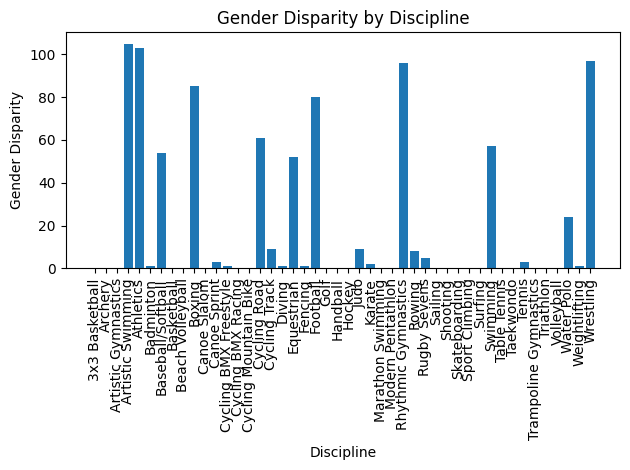

In [19]:
gender_disparity_pd = entriesgender_df.toPandas()
import matplotlib.pyplot as plt
plt.bar(gender_disparity_pd['Discipline'], gender_disparity_pd['GenderDisparity'])
plt.xlabel('Discipline')
plt.ylabel('Gender Disparity')
plt.title('Gender Disparity by Discipline')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [20]:
#Find which discipline had teams from the most number of countries participating?
teams_df.groupBy("Discipline").agg(count("Country").alias("Country_count")).orderBy("Country_count", ascending=False).show()

+-------------------+-------------+
|         Discipline|Country_count|
+-------------------+-------------+
|           Swimming|          113|
|          Athletics|           79|
|      Cycling Track|           64|
|            Archery|           53|
|            Fencing|           52|
|   Beach Volleyball|           48|
|       Table Tennis|           48|
|  Artistic Swimming|           32|
|           Football|           28|
|         Basketball|           24|
|Artistic Gymnastics|           24|
|           Handball|           24|
|       Rugby Sevens|           24|
|         Volleyball|           24|
|             Hockey|           24|
|         Water Polo|           22|
|          Triathlon|           18|
|     3x3 Basketball|           16|
|Rhythmic Gymnastics|           14|
|  Baseball/Softball|           12|
+-------------------+-------------+



In [21]:
# Calculate the average number of entries by gender for each discipline
average_entries_by_gender = entriesgender_df.withColumn(
    'Avg_Female', (entriesgender_df['Female'] / entriesgender_df['Total']) * 100
).withColumn(
    'Avg_Male', (entriesgender_df['Male'] / entriesgender_df['Total']) * 100
)
average_entries_by_gender.show()


+--------------------+------+----+-----+---------------+------------------+------------------+
|          Discipline|Female|Male|Total|GenderDisparity|        Avg_Female|          Avg_Male|
+--------------------+------+----+-----+---------------+------------------+------------------+
|      3x3 Basketball|    32|  32|   64|              0|              50.0|              50.0|
|             Archery|    64|  64|  128|              0|              50.0|              50.0|
| Artistic Gymnastics|    98|  98|  196|              0|              50.0|              50.0|
|   Artistic Swimming|   105|   0|  105|            105|             100.0|               0.0|
|           Athletics|   969|1072| 2041|            103| 47.47672709456149| 52.52327290543851|
|           Badminton|    86|  87|  173|              1| 49.71098265895954| 50.28901734104046|
|   Baseball/Softball|    90| 144|  234|             54| 38.46153846153847| 61.53846153846154|
|          Basketball|   144| 144|  288|          

In [22]:
#Creating temporary views
athletes_df.createOrReplaceTempView("Athletes")
coaches_df.createOrReplaceTempView("Coaches")
entriesgender_df.createOrReplaceTempView("EntriesGender")
medals_df.createOrReplaceTempView("Medals")
teams_df.createOrReplaceTempView("Teams")

In [23]:
#Joining athletes and coaches table based on Country and Discipline
athletes_coaches = spark.sql("""
SELECT a.PersonName, a.Country, a.Discipline, c.Name as CoachName
FROM Athletes a
JOIN Coaches c ON a.Country = c.Country AND a.Discipline = c.Discipline
""")
athletes_coaches.show()

+-----------------+--------------------+-----------------+----------------+
|       PersonName|             Country|       Discipline|       CoachName|
+-----------------+--------------------+-----------------+----------------+
|NEMICH Yekaterina|          Kazakhstan|Artistic Swimming|DEMCHENKO Zhanna|
| NEMICH Alexandra|          Kazakhstan|Artistic Swimming|DEMCHENKO Zhanna|
|           ZHU Yu|People's Republic...|         Football|     JIA Xiuquan|
|        ZHANG Xin|People's Republic...|         Football|     JIA Xiuquan|
|         YANG Man|People's Republic...|         Football|     JIA Xiuquan|
|        YANG Lina|People's Republic...|         Football|     JIA Xiuquan|
|        XIAO Yuyi|People's Republic...|         Football|     JIA Xiuquan|
|       WURIGUMULA|People's Republic...|         Football|     JIA Xiuquan|
|        WANG Ying|People's Republic...|         Football|     JIA Xiuquan|
|      WANG Yanwen|People's Republic...|         Football|     JIA Xiuquan|
|         WA

In [24]:
#Showing coaches from the country
spark.sql("""SELECT name FROM coaches where Country = "People's Republic of China" """).show()

+--------------------+
|                name|
+--------------------+
|          BAO Zhuang|
|         JIA Xiuquan|
|           LANG Ping|
|MACKINTOSH Euan M...|
|   MULATI Adilijiang|
|       POROBIC Petar|
|            WANG Jie|
|            WANG Jie|
|           WANG Yang|
|            XU Limin|
|         YUAN Lingxi|
|      ZHANG Xiaohuan|
+--------------------+



In [25]:
spark.sql("""SELECT name FROM coaches where Country = "People's Republic of China" AND Discipline = "Football" """).show()

+-----------+
|       name|
+-----------+
|JIA Xiuquan|
+-----------+



In [26]:
spark.sql("""SELECT name FROM coaches where Country = "Kazakhstan" AND Discipline = "Artistic Swimming" """).show()

+----------------+
|            name|
+----------------+
|DEMCHENKO Zhanna|
+----------------+



In [27]:
athletes_teams = spark.sql("""
SELECT a.PersonName, a.Country, a.Discipline, t.TeamName, t.Event
FROM Athletes a
JOIN Teams t ON a.Country = t.Country AND a.Discipline = t.Discipline
""")
athletes_teams.show()

+--------------------+--------------+-----------------+--------------+--------------------+
|          PersonName|       Country|       Discipline|      TeamName|               Event|
+--------------------+--------------+-----------------+--------------+--------------------+
|      HAMMED Mohamed|       Tunisia|          Archery|       Tunisia|          Mixed Team|
|       ELWALID Rihab|       Tunisia|          Archery|       Tunisia|          Mixed Team|
|   NEMICH Yekaterina|    Kazakhstan|Artistic Swimming|    Kazakhstan|                Duet|
|    NEMICH Alexandra|    Kazakhstan|Artistic Swimming|    Kazakhstan|                Duet|
|      MARUSAVA Hanna|       Belarus|          Archery|       Belarus|        Women's Team|
|  KAZLOUSKAYA Karyna|       Belarus|          Archery|       Belarus|        Women's Team|
| DZIOMINSKAYA Karyna|       Belarus|          Archery|       Belarus|        Women's Team|
|     VRZALOVA Simona|Czech Republic|        Athletics|Czech Republic|Men's 4 x 

In [28]:
#Joining tables Athletes,Coaches and Team based on country and discipline
#Event column removed in coaches table due to null values
athletes_coaches_teams = spark.sql("""
SELECT a.PersonName, a.Country, a.Discipline, c.Name as CoachName,t.TeamName, t.Event as TeamEvent
FROM Athletes a
JOIN Coaches c ON a.Country = c.Country AND a.Discipline = c.Discipline
JOIN Teams t ON a.Country = t.Country AND a.Discipline = t.Discipline
""")
athletes_coaches_teams.show()

+-----------------+--------------------+-----------------+----------------+----------+---------+
|       PersonName|             Country|       Discipline|       CoachName|  TeamName|TeamEvent|
+-----------------+--------------------+-----------------+----------------+----------+---------+
|NEMICH Yekaterina|          Kazakhstan|Artistic Swimming|DEMCHENKO Zhanna|Kazakhstan|     Duet|
| NEMICH Alexandra|          Kazakhstan|Artistic Swimming|DEMCHENKO Zhanna|Kazakhstan|     Duet|
|           ZHU Yu|People's Republic...|         Football|     JIA Xiuquan|     China|    Women|
|        ZHANG Xin|People's Republic...|         Football|     JIA Xiuquan|     China|    Women|
|         YANG Man|People's Republic...|         Football|     JIA Xiuquan|     China|    Women|
|        YANG Lina|People's Republic...|         Football|     JIA Xiuquan|     China|    Women|
|        XIAO Yuyi|People's Republic...|         Football|     JIA Xiuquan|     China|    Women|
|       WURIGUMULA|People's Re

In [29]:
athletes_coaches_teams.select("TeamEvent").distinct().show()


+---------+
|TeamEvent|
+---------+
| Softball|
|     Team|
|      Men|
|     Duet|
| Baseball|
|    Women|
+---------+



In [30]:
#Showing coaches with Team event is softball and who is from canada
athletes_coaches_teams.filter((athletes_coaches_teams['TeamEvent'] == 'Softball') & (athletes_coaches_teams['Country'] == 'Canada')).select('CoachName', 'Country').show()


+-------------+-------+
|    CoachName|Country|
+-------------+-------+
|ALAMEDA Lonni| Canada|
|  BASILIO Mel| Canada|
|  JONES Chris| Canada|
|   SMITH Mark| Canada|
|ALAMEDA Lonni| Canada|
|  BASILIO Mel| Canada|
|  JONES Chris| Canada|
|   SMITH Mark| Canada|
|ALAMEDA Lonni| Canada|
|  BASILIO Mel| Canada|
|  JONES Chris| Canada|
|   SMITH Mark| Canada|
|ALAMEDA Lonni| Canada|
|  BASILIO Mel| Canada|
|  JONES Chris| Canada|
|   SMITH Mark| Canada|
|ALAMEDA Lonni| Canada|
|  BASILIO Mel| Canada|
|  JONES Chris| Canada|
|   SMITH Mark| Canada|
+-------------+-------+
only showing top 20 rows



In [35]:
# Exporting the transformed data with headers
athletes_coaches_teams.write.format("csv").option("header", "true").save("Athletes")
entriesgender_df.write.format("csv").option("header", "true").save("Entriesgender")
medals_df.write.format("csv").option("header", "true").save("Medals")
